In [23]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import scipy


from datetime import datetime 
import calendar
import statsmodels.formula.api as smf  


from matplotlib import style
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns 



%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'


pd.set_option('display.max_rows',None)


pd.set_option('display.max_columns', None)

In [24]:
data = pd.read_csv('d:\python2025/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

Preclose       Open    Highest     Lowest      Close
Day                                                              
1990-12-19               96.0500    99.9800    95.7900    99.9800
1990-12-20      99.98   104.3000   104.3900    99.9800   104.3900
1990-12-21     104.39   109.0700   109.1300   103.7300   109.1300
1990-12-24     109.13   113.5700   114.5500   109.1300   114.5500
1990-12-25     114.55   120.0900   120.2500   114.5500   120.2500
1990-12-26     120.25   125.2700   125.2700   120.2500   125.2700
1990-12-27     125.27   125.2700   125.2800   125.2700   125.2800
1990-12-28     125.28   126.3900   126.4500   125.2800   126.4500
1990-12-31     126.45   126.5600   127.6100   126.4800   127.6100
1991-01-02     127.61   127.6100   128.8400   127.6100   128.8400
1991-01-03     128.84   128.8400   130.1400   128.8400   130.1400
1991-01-04     130.14   131.2700   131.4400   130.1400   131.4400
1991-01-07     131.44   131.9900   132.0600   131.4500   132.0600
1991-01-08     132.06   132.6200   132.6800   132.0600   132.6800
1991-01-09     132.68   133.3000   133.3400   132.6800   133.3400
1991-01-10     133.34   133.9300   133.9700   133.3400   133.9700
1991-01-11     133.97   134.6100   134.6100   134.5100   134.6000
1991-01-14      134.6   134.1100   135.1900   134.1100   134.6700
1991-01-15     134.67   134.2100   134.7400   134.1900   134.7400
1991-01-16     134.74   134.1900   134.7400   134.1400   134.2400
1991-01-17     134.24   133.6700   134.2500   133.6500   134.2500
1991-01-18     134.25   133.7000   134.2500   133.6700   134.2400
1991-01-21     134.24   133.7000   134.2400   133.6600   134.2400
1991-01-22     134.24   133.7200   134.2400   133.6600   133.7200
1991-01-23     133.72   133.1700   133.7200   133.1400   133.1700
1991-01-24     133.17   132.6100   133.1700   132.5700   132.6100
1991-01-25     132.61   132.0500   132.0700   132.0300   132.0500
1991-01-28     132.05   131.4600   131.5500   131.4600   131.4600
1991-01-29     131.46   130.9500   130.9700   130.9500   130.9500
1991-01-30     130.95   130.4400   130.9500   130.4100   130.4400
1991-01-31     130.44   129.9300   130.4600   129.9300   129.9700
1991-02-01     129.97   129.5000   129.9700   129.4500   129.5100
1991-02-04     129.51   129.0500   129.5800   129.0500   129.0500
1991-02-05     129.05   128.5600   128.5800   128.5300   128.5800
1991-02-06     128.58   129.1300   129.1500   128.0600   129.1400
1991-02-07     129.14   129.7400   129.7900   129.1400   129.7900
1991-02-08     129.79   130.3600   130.3900   129.7900   130.3800
1991-02-11     130.38   130.9200   130.9700   130.3900   130.9700
1991-02-12     130.97   131.5400   131.5600   130.9700   131.3500
1991-02-13     131.35   131.9300   131.9300   131.3500   131.9200
1991-02-14     131.92   132.5300   132.5300   132.3000   132.5300
1991-02-19     132.53   133.1200   133.1400   133.0800   133.1300
1991-02-20     133.13   133.6300   133.6700   133.1300   133.6700
1991-02-21     133.67   134.2400   134.2800   133.6700   134.2800
1991-02-22     134.28   134.8500   134.8700   134.2800   134.8700
1991-02-25     134.87   134.3700   134.8700   134.3300   134.4000
1991-02-26      134.4   133.9000   134.4400   133.9000   133.9300
1991-02-27     133.93   133.4400   133.9800   133.4400   133.4700
1991-02-28     133.47   132.9900   133.5200   132.9800   133.0100
1991-03-01     133.01   132.5300   132.5300   132.4700   132.5300
1991-03-04     132.53   132.0900   132.0900   131.9800   131.9900
1991-03-05     131.99   131.4200   131.9900   131.4100   131.4600
1991-03-06     131.46   130.8900   130.9500   130.8900   130.9400
1991-03-07     130.94   130.4100   130.9400   130.4100   130.4100
1991-03-08     130.41   129.8400   130.4100   129.8400   129.8900
1991-03-11     129.89   129.3000   129.8900   129.3000   129.3100
1991-03-12     129.31   128.7300   129.3100   128.7300   128.7700
1991-03-13     128.77   126.1300   128.7700   126.1300   126.1500
1991-03-14     126.15   125.6100   126.1500   125.610

In [25]:
data_new = data['1995-01':'2024-07'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

Preclose       Open    Highest     Lowest      Close  Raw_return
Day                                                                          
1995-01-03   647.8700   637.7200   647.7100   630.5300   639.8800   -0.012333
1995-01-04   639.8800   641.9000   655.5100   638.8600   653.8100    0.021770
1995-01-05   653.8100   655.3800   657.5200   645.8100   646.8900   -0.010584
1995-01-06   646.8900   642.7500   643.8900   636.3300   640.7600   -0.009476
1995-01-09   640.7600   637.5200   637.5500   625.0400   626.0000   -0.023035
1995-01-10   626.0000   616.1600   617.6000   607.0600   610.3000   -0.025080
1995-01-11   610.3000   610.3000   615.2100   606.9200   613.1300    0.004637
1995-01-12   613.1300   612.7900   615.4700   601.1700   602.1200   -0.017957
1995-01-13   602.1200   597.3200   601.0700   593.8100   597.8400   -0.007108
1995-01-16   597.8400   591.0600   591.3200   584.8800   588.8100   -0.015104
1995-01-17   588.8100   591.8100   595.0200   586.6000   587.9400   -0.001478
1995-01-18   587.9400   588.5300   593.6500   586.9900   593.6400    0.009695
1995-01-19   593.6400   589.7000   593.1000   571.3600   571.7200   -0.036925
1995-01-20   571.7200   566.8100   578.5300   559.6600   571.2400   -0.000840
1995-01-23   571.2400   564.8600   565.0400   553.1100   553.4400   -0.031160
1995-01-24   553.4400   552.7800   559.3400   547.3800   547.5700   -0.010606
1995-01-25   547.5700   550.2700   558.5800   550.2700   555.7700    0.014975
1995-01-26   555.7700   553.9100   555.2600   551.1400   553.1100   -0.004786
1995-01-27   553.1100   552.9500   564.6100   552.9300   562.5900    0.017139
1995-02-06   562.5900   559.7800   559.8400   532.9100   533.7200   -0.051316
1995-02-07   533.7200   532.1100   536.6300   524.4300   532.4900   -0.002305
1995-02-08   532.4900   533.0900   537.5500   531.2200   533.7500    0.002366
1995-02-09   533.7500   533.7900   553.3600   533.1400   553.3600    0.036740
1995-02-10   553.3600   548.7700   558.9500   540.6300   541.3800   -0.021650
1995-02-13   541.3800   537.9500   550.2500   537.0500   548.8400    0.013780
1995-02-14   548.8400   549.7600   552.3500   542.1800   548.1100   -0.001330
1995-02-15   548.1100   547.8300   548.6900   542.5000   542.8400   -0.009615
1995-02-16   542.8400   542.2600   542.8200   537.2100   538.3700   -0.008234
1995-02-17   538.3700   537.8700   537.9100   532.6700   533.7600   -0.008563
1995-02-20   533.7600   534.5700   540.8600   534.5100   534.9600    0.002248
1995-02-21   534.9600   536.0700   541.1400   535.9700   541.1400    0.011552
1995-02-22   541.1400   541.2100   594.8100   541.2100   594.6400    0.098865
1995-02-23   594.6400   589.9000   611.8900   575.8200   589.1300   -0.009266
1995-02-24   589.1300   591.9100   594.9200   555.2000   558.4300   -0.052111
1995-02-27   558.4300   584.0200   591.4300   559.0400   561.2700    0.005086
1995-02-28   561.2700   558.4200   558.4200   544.0600   549.2600   -0.021398
1995-03-01   549.2600   548.9100   559.4800   545.7200   556.9600    0.014019
1995-03-02   556.9600   557.5000   564.6400   553.5200   560.8500    0.006984
1995-03-03   560.8500   562.3000   580.3900   562.3000   577.2200    0.029188
1995-03-06   577.2200   585.2400   616.7600   582.5500   616.3000    0.067704
1995-03-07   616.3000   614.7300   635.2400   597.2000   632.9600    0.027032
1995-03-08   632.9600   632.9600   634.2000   618.8000   620.8100   -0.019196
1995-03-09   620.8100   617.2200   624.2500   604.7900   605.5900   -0.024516
1995-03-10   605.5900   600.4500   600.5100   583.7200   586.2900   -0.031870
1995-03-13   586.2900   596.6500   597.1800   583.3800   586.2300   -0.000102
1995-03-14   586.2300   588.1800   599.9000   586.1900   588.2400    0.003429
1995-03-15   588.2400   588.7800   591.4900   568.6000   572.6000   -0.026588
1995-03-16   572.6000   570.5100   579.8800   569.1700   579.8800    0.012714
1995-03-17   579.8800   579.6200   593.9700   577.9100   593.5200    0.023522
1995-03-20   593.5200   597.8500   

In [26]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Month_data

Ret
Day                 
1995-01-31 -0.131631
1995-02-28 -0.023694
1995-03-31  0.177803
1995-04-30 -0.103552
1995-05-31  0.207922
1995-06-30 -0.099827
1995-07-31  0.103032
1995-08-31  0.040716
1995-09-30 -0.001989
1995-10-31 -0.007073
1995-11-30 -0.106201
1995-12-31 -0.133902
1996-01-31 -0.032307
1996-02-29  0.029013
1996-03-31  0.006239
1996-04-30  0.224249
1996-05-31 -0.055068
1996-06-30  0.249514
1996-07-31  0.022667
1996-08-31 -0.015247
1996-09-30  0.080981
1996-10-31  0.115564
1996-11-30  0.057581
1996-12-31 -0.112232
1997-01-31  0.052038
1997-02-28  0.078291
1997-03-31  0.186826
1997-04-30  0.128890
1997-05-31 -0.077898
1997-06-30 -0.027164
1997-07-31 -0.048398
1997-08-31  0.026308
1997-09-30 -0.101289
1997-10-31  0.075644
1997-11-30 -0.034531
1997-12-31  0.047796
1998-01-31  0.024127
1998-02-28 -0.013394
1998-03-31  0.030244
1998-04-30  0.080795
1998-05-31  0.050437
1998-06-30 -0.051027
1998-07-31 -0.016637
1998-08-31 -0.126583
1998-09-30  0.080576
1998-10-31 -0.020581
1998-11-30  0.024726
1998-12-31 -0.080743
1999-01-31 -0.010491
1999-02-28 -0.039289
1999-03-31  0.062343
1999-04-30 -0.032054
1999-05-31  0.141311
1999-06-30  0.320558
1999-07-31 -0.052071
1999-08-31  0.016023
1999-09-30 -0.034675
1999-10-31 -0.042109
1999-11-30 -0.046253
1999-12-31 -0.047660
2000-01-31  0.123242
2000-02-29  0.116990
2000-03-31  0.049948
2000-04-30  0.020053
2000-05-31  0.031710
2000-06-30  0.017714
2000-07-31  0.049494
2000-08-31 -0.001156
2000-09-30 -0.054938
2000-10-31  0.026767
2000-11-30  0.055739
2000-12-31  0.001386
2001-01-31 -0.003796
2001-02-28 -0.051525
2001-03-31  0.078400
2001-04-30  0.003029
2001-05-31  0.044866
2001-06-30  0.001703
2001-07-31 -0.134223
2001-08-31 -0.044878
2001-09-30 -0.037767
2001-10-31 -0.042893
2001-11-30  0.034822
2001-12-31 -0.058364
2002-01-31 -0.093750
2002-02-28  0.022150
2002-03-31  0.051945
2002-04-30  0.039809
2002-05-31 -0.091153
2002-06-30  0.143185
2002-07-31 -0.046844
2002-08-31  0.009100
2002-09-30 -0.051001
2002-10-31 -0.046863
2002-11-30 -0.048637
2002-12-31 -0.053362
2003-01-31  0.104718
2003-02-28  0.008074
2003-03-31 -0.000893
2003-04-30  0.007189
2003-05-31  0.036032
2003-06-30 -0.057249
2003-07-31 -0.006245
2003-08-31 -0.037082
2003-09-30 -0.038552
2003-10-31 -0.013795
2003-11-30  0.036283
2003-12-31  0.071442
2004-01-31  0.062583
2004-02-29  0.053020
2004-03-31  0.039730
2004-04-30 -0.083847
2004-05-31 -0.024869
2004-06-30 -0.100745
2004-07-31 -0.009263
2004-08-31 -0.031842
2004-09-30  0.040714
2004-10-31 -0.054529
2004-11-30  0.015319
2004-12-31 -0.055394
2005-01-31 -0.058966
2005-02-28  0.095803
2005-03-31 -0.095528
2005-04-30 -0.018701
2005-05-31 -0.084898
2005-06-30  0.019043
2005-07-31  0.001934
2005-08-31  0.073654
2005-09-30 -0.006183
2005-10-31 -0.054335
2005-11-30  0.005893
2005-12-31  0.056220
2006-01-31  0.083536
2006-02-28  0.032574
2006-03-31 -0.000562
2006-04-30  0.109312
2006-05-31  0.139618
2006-06-30  0.018833
2006-07-31 -0.035570
2006-08-31  0.028467
2006-09-30  0.056540
2006-10-31  0.048830
2006-11-30  0.142166
2006-12-31  0.274464
2007-01-31  0.041439
2007-02-28  0.033998
2007-03-31  0.105138
2007-04-30  0.206437
2007-05-31  0.069868
2007-06-30 -0.070310
2007-07-31  0.170212
2007-08-31  0.167252
2007-09-30  0.063900
2007-10-31  0.072487
2007-11-30 -0.181869
2007-12-31  0.080008
2008-01-31 -0.166903
2008-02-29 -0.007950
2008-03-31 -0.201408
2008-04-30  0.063466
2008-05-31 -0.070336
2008-06-30 -0.203082
2008-07-31  0.014480
2008-08-31 -0.136307
2008-09-30 -0.043210
2008-10-31 -0.246314
2008-11-30  0.082352
2008-12-31 -0.026908
2009-01-31  0.093283
2009-02-28  0.046311
2009-03-31  0.139405
2009-04-30  0.043974
2009-05-31  0.062707
2009-06-30  0.123980
2009-07-31  0.152972
2009-08-31 -0.218144
2009-09-30  0.041867
2009-10-31  0.077865
2009-11-30  0.066575
2009-12-31  0.025613
2010-01-31 -0.087836
2010-02-28  0.020958
2010-03-31  0.018732
2010-04-30 -0.076710
2010-05-31 -0.097004
2010-06-30 -0.074756
2010-07-31  0.099705
2010-08-31  0.000493
2010-09-30  0.006389
2010-1

In [27]:
Quarter_data = data_new.resample('Q')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Quarter_data

Ret
Day                 
1995-03-31 -0.001466
1995-06-30 -0.025258
1995-09-30  0.145660
1995-12-31 -0.231358
1996-03-31  0.001981
1996-06-30  0.445479
1996-09-30  0.088629
1996-12-31  0.047388
1997-03-31  0.346339
1997-06-30  0.012676
1997-09-30 -0.122286
1997-12-31  0.088137
1998-03-31  0.040968
1998-06-30  0.077376
1998-09-30 -0.071909
1998-12-31 -0.077400
1999-03-31  0.009898
1999-06-30  0.458858
1999-09-30 -0.070278
1999-12-31 -0.129955
2000-03-31  0.317318
2000-06-30  0.071041
2000-09-30 -0.009310
2000-12-31  0.085501
2001-03-31  0.018954
2001-06-30  0.049816
2001-09-30 -0.204307
2001-12-31 -0.067370
2002-03-31 -0.025559
2002-06-30  0.080342
2002-09-30 -0.087225
2002-12-31 -0.141608
2003-03-31  0.112643
2003-06-30 -0.016259
2003-09-30 -0.079985
2003-12-31  0.095000
2004-03-31  0.163376
2004-06-30 -0.196633
2004-09-30 -0.001758
2004-12-31 -0.093220
2005-03-31 -0.067319
2005-06-30 -0.084911
2005-09-30  0.069079
2005-12-31  0.004716
2006-03-31  0.118202
2006-06-30  0.288000
2006-09-30  0.047966
2006-12-31  0.526729
2007-03-31  0.190064
2007-06-30  0.199976
2007-09-30  0.453215
2007-12-31 -0.052364
2008-03-31 -0.339985
2008-06-30 -0.212114
2008-09-30 -0.161661
2008-12-31 -0.206197
2009-03-31  0.303381
2009-06-30  0.246986
2009-09-30 -0.060800
2009-12-31  0.179069
2010-03-31 -0.051273
2010-06-30 -0.228599
2010-09-30  0.107277
2010-12-31  0.057394
2011-03-31  0.042745
2011-06-30 -0.056702
2011-09-30 -0.145854
2011-12-31 -0.067734
2012-03-31  0.028812
2012-06-30 -0.016511
2012-09-30 -0.062577
2012-12-31  0.087701
2013-03-31 -0.014327
2013-06-30 -0.115089
2013-09-30  0.098752
2013-12-31 -0.026984
2014-03-31 -0.039069
2014-06-30  0.007387
2014-09-30  0.154047
2014-12-31  0.368383
2015-03-31  0.158662
2015-06-30  0.141231
2015-09-30 -0.286270
2015-12-31  0.159330
2016-03-31 -0.151238
2016-06-30 -0.024738
2016-09-30  0.025631
2016-12-31  0.032928
2017-03-31  0.038300
2017-06-30 -0.009334
2017-09-30  0.049025
2017-12-31 -0.012473
2018-03-31 -0.041809
2018-06-30 -0.101448
2018-09-30 -0.009156
2018-12-31 -0.116061
2019-03-31  0.239328
2019-06-30 -0.036198
2019-09-30 -0.024737
2019-12-31  0.049887
2020-03-31 -0.098298
2020-06-30  0.085216
2020-09-30  0.078193
2020-12-31  0.079247
2021-03-31 -0.008972
2021-06-30  0.043374
2021-09-30 -0.006413
2021-12-31  0.020069
2022-03-31 -0.106484
2022-06-30  0.045022
2022-09-30 -0.110111
2022-12-31  0.021448
2023-03-31  0.059432
2023-06-30 -0.021632
2023-09-30 -0.028603
2023-12-31 -0.043575
2024-03-31  0.022263
2024-06-30 -0.024255
2024-09-30 -0.009656

In [28]:
Year_data = data_new.resample('Y')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Year_data

Ret
Day                 
1995-12-31 -0.142899
1996-12-31  0.651425
1997-12-31  0.302153
1998-12-31 -0.039695
1999-12-31  0.191750
2000-12-31  0.517277
2001-12-31 -0.206180
2002-12-31 -0.175167
2003-12-31  0.102670
2004-12-31 -0.153997
2005-12-31 -0.083253
2006-12-31  1.304334
2007-12-31  0.966593
2008-12-31 -0.653941
2009-12-31  0.799825
2010-12-31 -0.143131
2011-12-31 -0.216753
2012-12-31  0.031695
2013-12-31 -0.067493
2014-12-31  0.528691
2015-12-31  0.094136
2016-12-31 -0.123062
2017-12-31  0.065578
2018-12-31 -0.245911
2019-12-31  0.223032
2020-12-31  0.138667
2021-12-31  0.048001
2022-12-31 -0.151250
2023-12-31 -0.037007
2024-12-31 -0.012163

In [29]:
Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')
Month_data['Decade'] = (Month_data['Year'] // 10) * 10
Month_data['Rolling_ann_return'] = (1 + Month_data['Ret']).rolling(window=12, min_periods=12).apply(lambda x: np.prod(x) - 1, raw=True)
Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(window=12, min_periods=12).std() * np.sqrt(12)
Month_data

Ret  Year  Month Month_name  Decade  Rolling_ann_return  \
Day                                                                        
1995-01-31 -0.131631  1995      1        Jan    1990                 NaN   
1995-02-28 -0.023694  1995      2        Feb    1990                 NaN   
1995-03-31  0.177803  1995      3        Mar    1990                 NaN   
1995-04-30 -0.103552  1995      4        Apr    1990                 NaN   
1995-05-31  0.207922  1995      5        May    1990                 NaN   
1995-06-30 -0.099827  1995      6        Jun    1990                 NaN   
1995-07-31  0.103032  1995      7        Jul    1990                 NaN   
1995-08-31  0.040716  1995      8        Aug    1990                 NaN   
1995-09-30 -0.001989  1995      9        Sep    1990                 NaN   
1995-10-31 -0.007073  1995     10        Oct    1990                 NaN   
1995-11-30 -0.106201  1995     11        Nov    1990                 NaN   
1995-12-31 -0.133902  1995     12        Dec    1990           -0.142899   
1996-01-31 -0.032307  1996      1        Jan    1990           -0.044864   
1996-02-29  0.029013  1996      2        Feb    1990            0.006700   
1996-03-31  0.006239  1996      3        Mar    1990           -0.139940   
1996-04-30  0.224249  1996      4        Apr    1990            0.174556   
1996-05-31 -0.055068  1996      5        May    1990           -0.081169   
1996-06-30  0.249514  1996      6        Jun    1990            0.275413   
1996-07-31  0.022667  1996      7        Jul    1990            0.182489   
1996-08-31 -0.015247  1996      8        Aug    1990            0.118903   
1996-09-30  0.080981  1996      9        Sep    1990            0.211924   
1996-10-31  0.115564  1996     10        Oct    1990            0.361610   
1996-11-30  0.057581  1996     11        Nov    1990            0.611115   
1996-12-31 -0.112232  1996     12        Dec    1990            0.651425   
1997-01-31  0.052038  1997      1        Jan    1990            0.795366   
1997-02-28  0.078291  1997      2        Feb    1990            0.881343   
1997-03-31  0.186826  1997      3        Mar    1990            1.218983   
1997-04-30  0.128890  1997      4        Apr    1990            1.046142   
1997-05-31 -0.077898  1997      5        May    1990            0.996706   
1997-06-30 -0.027164  1997      6        Jun    1990            0.554579   
1997-07-31 -0.048398  1997      7        Jul    1990            0.446552   
1997-08-31  0.026308  1997      8        Aug    1990            0.507593   
1997-09-30 -0.101289  1997      9        Sep    1990            0.253389   
1997-10-31  0.075644  1997     10        Oct    1990            0.208537   
1997-11-30 -0.034531  1997     11        Nov    1990            0.103277   
1997-12-31  0.047796  1997     12        Dec    1990            0.302153   
1998-01-31  0.024127  1998      1        Jan    1990            0.267606   
1998-02-28 -0.013394  1998      2        Feb    1990            0.159824   
1998-03-31  0.030244  1998      3        Mar    1990            0.006804   
1998-04-30  0.080795  1998      4        Apr    1990           -0.036090   
1998-05-31  0.050437  1998      5        May    1990            0.098064   
1998-06-30 -0.051027  1998      6        Jun    1990            0.071129   
1998-07-31 -0.016637  1998      7        Jul    1990            0.106879   
1998-08-31 -0.126583  1998      8        Aug    1990           -0.058015   
1998-09-30  0.080576  1998      9        Sep    1990            0.132607   
1998-10-31 -0.020581  1998     10        Oct    1990            0.031286   
1998-11-30  0.024726  1998     11        Nov    1990            0.094583   
1998-12-31 -0.080743  1998     12        Dec    1990           -0.039695   
1999-01-31 -0.010491  1999      1        Jan    1990           -0.072156   
1999-02-28 -0.039289  1999      2        Feb    1990           -0.096508   
1999-03-31  0.062343  1999      3        Mar    1990           -0

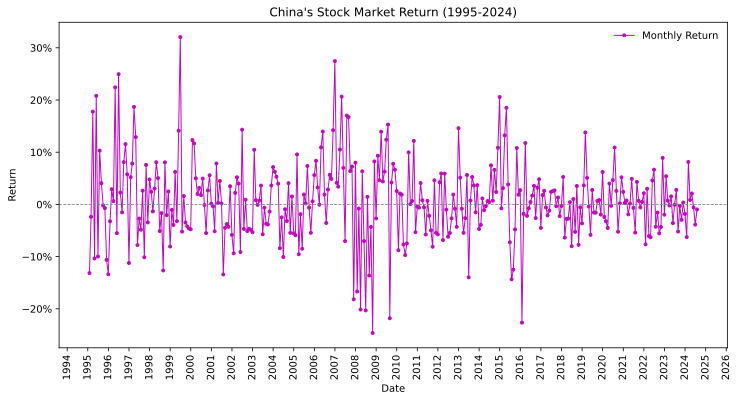

In [30]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(
    'Ret',  
    '.-',  
    color = "#C208BF",  
    label = 'Monthly Return',  
    linewidth = 1,  
    data = Month_data['1995-01-01':'2024-07-31'])  
ax.set_title("China's Stock Market Return (1995-2024)")
ax.set_xlabel('Date')
plt.ylabel('Return')

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator(1))  

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xticks(rotation=90)

plt.legend(loc='upper right', frameon=False, fontsize=10)

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)


fig.savefig('d:\python2025/Monthly_return.pdf', bbox_inches='tight')
plt.show();

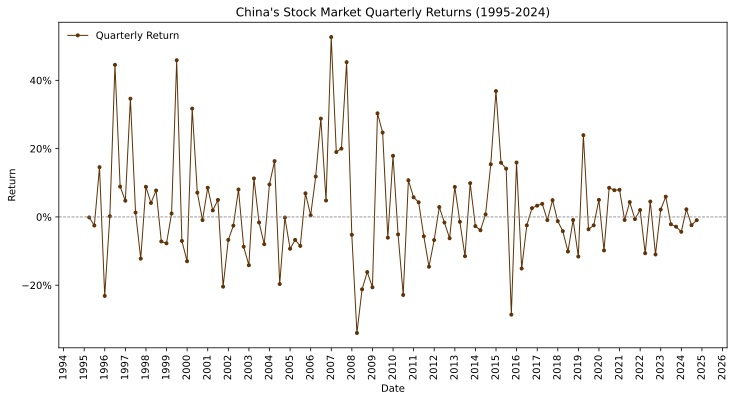

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(
    Quarter_data.index,  
    Quarter_data['Ret'],  
    '.-',  
    color = "#5E3205",  
    label = 'Quarterly Return', 
    linewidth = 1, 
)
ax.set_title("China's Stock Market Quarterly Returns (1995-2024)")
ax.set_xlabel('Date') 
plt.ylabel('Return') 

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator(1)) 

plt.xticks(rotation=90)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

plt.legend(loc='upper left', frameon=False, fontsize=10)

fig.savefig('d:\python2025/Quarterly_return.pdf', bbox_inches='tight')
plt.show();

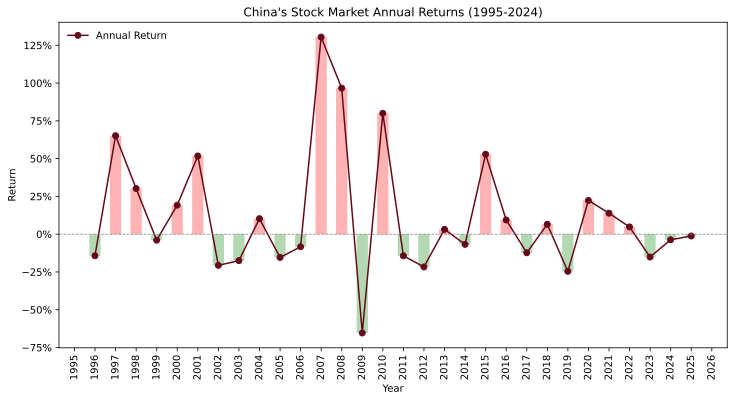

In [32]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(
    Year_data.index,  
    Year_data['Ret'],  
    'o-', 
    color = "#640919", 
    label = 'Annual Return',  
    linewidth = 1.5, 
)
ax.set_title("China's Stock Market Annual Returns (1995-2024)") 
ax.set_xlabel('Year') 
plt.ylabel('Return')

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator(1))  

plt.xticks(rotation=90)


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

for i, year in enumerate(Year_data.index):
    if Year_data['Ret'].iloc[i] >= 0:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='red')
    else:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='green')


plt.legend(loc='upper left', frameon=False, fontsize=10)


fig.savefig('d:\python2025/Yearly_return.pdf', bbox_inches='tight')
plt.show();

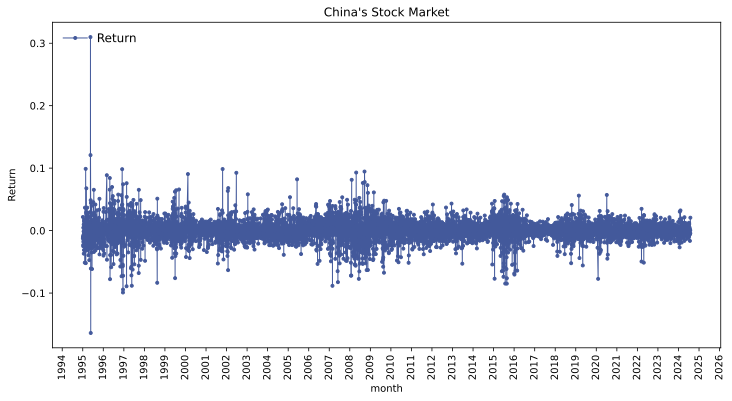

In [33]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(
    'Raw_return',  
    '.-',  
    color = "#43599B",  
    label = 'Return',  
    linewidth = 1,  
    data = data_new['1995-01-01':'2024-07-31'])  
ax.set_title("China's Stock Market") 
ax.set_xlabel('month') 
plt.ylabel('Return') 

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)

plt.legend(loc='upper left', frameon=False, fontsize=12)
fig.savefig('d:\python2025/Daily_return.pdf', bbox_inches='tight')
plt.show();

In [34]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1

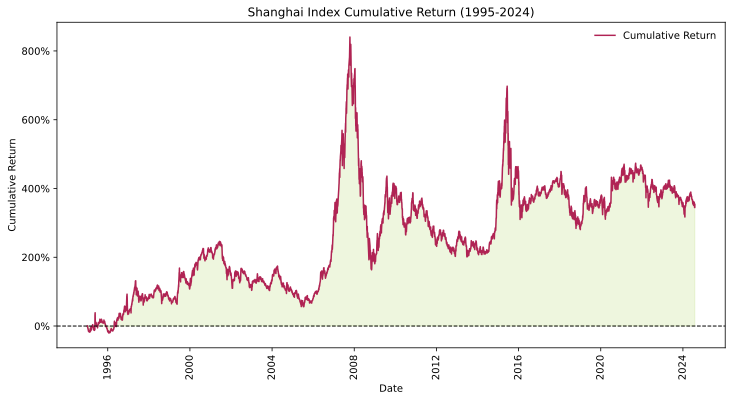

In [35]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_new.index, data_new['Cum_return'], color="#B02354", linewidth=1.5, label='Cumulative Return')
ax.fill_between(data_new.index, 0, data_new['Cum_return'], color="#8FC726A6", alpha=0.15)
ax.axhline(0, color='black', linewidth=1.0, linestyle='--')
ax.set_title('Shanghai Index Cumulative Return (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(frameon=False) # 图例不显示边框
fig.savefig('d:\python2025/Cumulative_return.pdf', bbox_inches='tight')
plt.show();

In [36]:
data_new['Peak'] = data_new['Cum_return'].cummax() 
data_new['Drawdown'] = data_new['Cum_return'] - data_new['Peak'] 

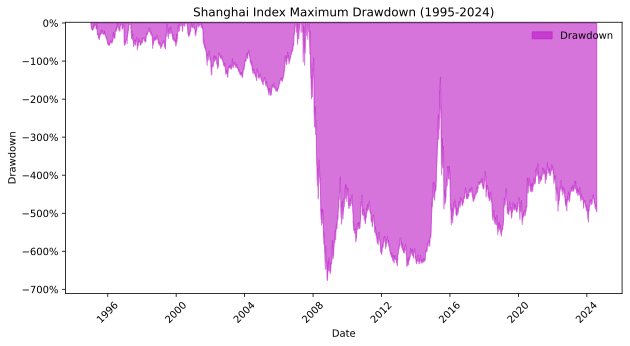

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.fill_between(data_new.index, data_new['Drawdown'], 0, color="#BB18C4", alpha=0.6, label='Drawdown')
ax.set_title('Shanghai Index Maximum Drawdown (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(data_new['Drawdown'].min() * 1.05, 0.02)
plt.xticks(rotation=45)
plt.legend(frameon=False)
fig.savefig('d:\python2025/Maximum_drawdown.pdf', bbox_inches='tight')
plt.show();

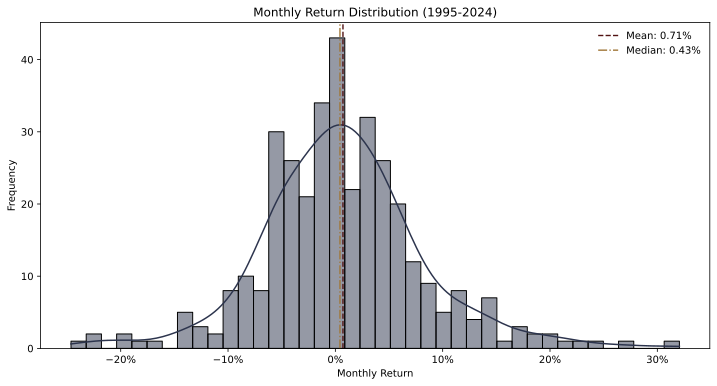

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(Month_data['Ret'].dropna(), bins=40, kde=True, color="#2C344D", ax=ax)
mean_return = Month_data['Ret'].mean()
median_return = Month_data['Ret'].median()
ax.axvline(mean_return, color="#521313", linestyle='--', linewidth=1.4, label=f"Mean: {mean_return:.2%}")
ax.axvline(median_return, color="#A07739", linestyle='-.', linewidth=1.4, label=f"Median: {median_return:.2%}")
ax.set_title("Monthly Return Distribution (1995-2024)")
ax.set_xlabel('Monthly Return')
ax.set_ylabel('Frequency')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 
plt.legend(frameon=False)
fig.savefig('d:\python2025/Monthly_return_distribution.pdf', bbox_inches='tight')
plt.show();


<AxesSubplot:xlabel='Month_name', ylabel='Ret'>

Text(0.5, 1.0, 'Monthly Return Distribution by Month (1995-2024)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Monthly Return')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

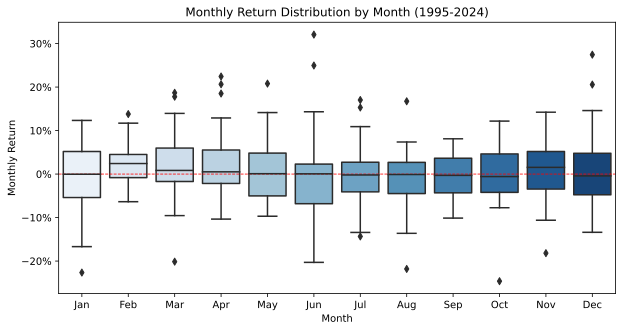

In [40]:

month_order = list(calendar.month_abbr[1:])
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(
    data=Month_data.dropna(subset=['Ret']),
    x='Month_name',
    y='Ret',
    order=month_order,
    palette='Blues',
    ax=ax
)
ax.set_title('Monthly Return Distribution by Month (1995-2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.8)
plt.xticks(rotation=0)

leg = ax.get_legend()
if leg:
    leg.remove()

fig.savefig('d:\\python2025/Monthly_return_boxplot.pdf', bbox_inches='tight')
plt.show()



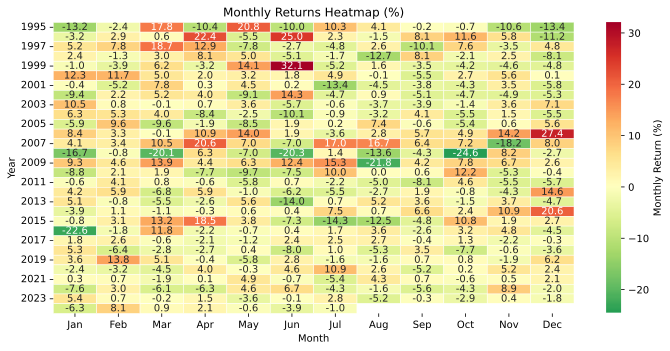

In [42]:
heatmap_data = Month_data.pivot_table(values='Ret', index='Year', columns='Month', aggfunc='first').sort_index()
heatmap_data.columns = [calendar.month_abbr[m] for m in heatmap_data.columns]

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(heatmap_data * 100, 
            cmap='RdYlGn_r',  
            center=0,      
            linewidths=0.5, 
            linecolor='white',
            cbar_kws={'label': 'Monthly Return (%)'},
            annot=True,     
            fmt='.1f',      
            ax=ax)

ax.set_title('Monthly Returns Heatmap (%)')
ax.set_xlabel('Month')
ax.set_ylabel('Year')

plt.tight_layout()
fig.savefig('d:\python2025/Monthly_heatmap.pdf', bbox_inches='tight')
plt.show();


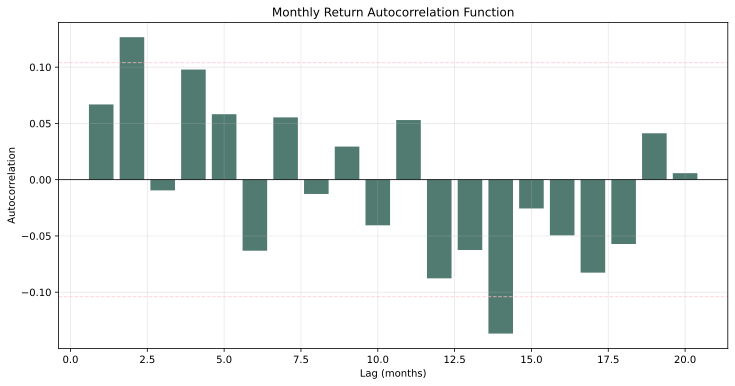

In [44]:
from statsmodels.tsa.stattools import acf

lags = 20
autocorr = acf(Month_data['Ret'].dropna(), nlags=lags, fft=True)

autocorr_no_zero = autocorr[1:]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(1, lags+1), autocorr_no_zero, alpha=0.7, color="#084235")
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=1.96/np.sqrt(len(Month_data['Ret'].dropna())), color='pink', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(Month_data['Ret'].dropna())), color='pink', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Monthly Return Autocorrelation Function')
ax.set_xlabel('Lag (months)')
ax.set_ylabel('Autocorrelation')
ax.grid(True, alpha=0.3)

fig.savefig('d:\python2025/Return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

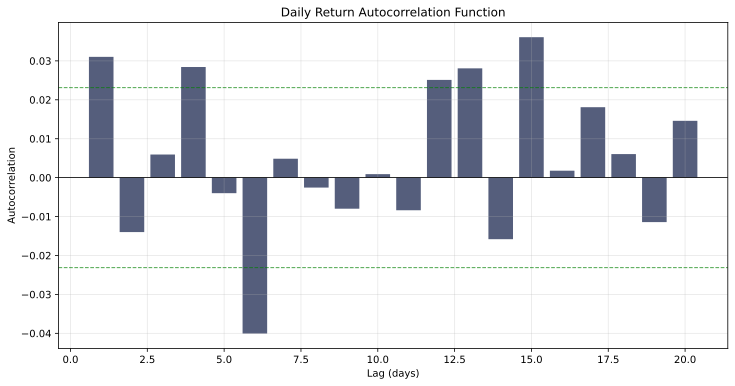

In [45]:
from statsmodels.tsa.stattools import acf


lags = 20
daily_autocorr = acf(data_new['Raw_return'].dropna(), nlags=lags, fft=True)

daily_autocorr_no_zero = daily_autocorr[1:]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(1, lags+1), daily_autocorr_no_zero, alpha=0.7, color="#0E1B45")
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='green', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='green', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Daily Return Autocorrelation Function')
ax.set_xlabel('Lag (days)')
ax.set_ylabel('Autocorrelation')   
ax.grid(True, alpha=0.3) 
fig.savefig('d:\python2025/Daily_return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

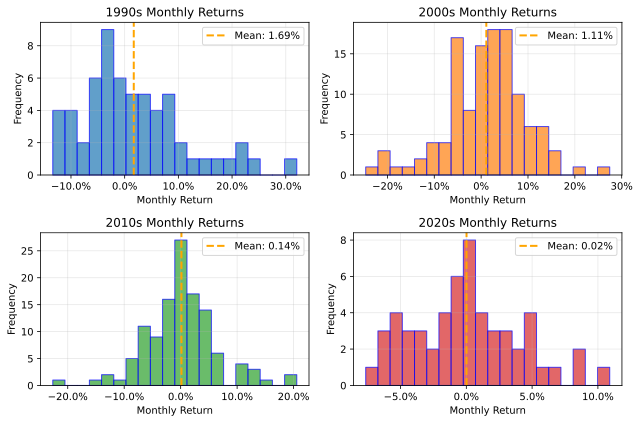

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
decades = Month_data['Decade'].unique()
decades = sorted([d for d in decades if not pd.isna(d)])

for i, decade in enumerate(decades):
    row = i // 2
    col = i % 2
    decade_data = Month_data[Month_data['Decade'] == decade]['Ret'].dropna()
    
    axes[row, col].hist(decade_data, bins=20, alpha=0.7, color=f'C{i}', edgecolor='blue', linewidth=1.0)
    axes[row, col].axvline(decade_data.mean(), color='orange', linestyle='--', linewidth=2, 
                          label=f'Mean: {decade_data.mean():.2%}')
    axes[row, col].set_title(f'{int(decade)}s Monthly Returns')
    axes[row, col].set_xlabel('Monthly Return')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
fig.savefig('d:\python2025/Decades_return_distribution.pdf', bbox_inches='tight')
plt.show();